In [68]:
import pandas as pd
import os
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [103]:
raw_df = pd.read_csv('encoded_dataset.csv')
raw_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,gt_ndvi,gt_msavi2
0,0,1.371782,1.119148,2.469079,3.164964,2.753141,-0.928685,-0.478396,1.861814,8.483894,0.026970,0.385535,0.546250
1,1,0.695777,0.471995,0.878227,2.781074,2.894665,-0.336990,0.175473,1.443329,5.313738,0.306638,0.520737,0.679225
2,2,0.535083,0.745858,2.881621,2.780188,2.232395,-0.426074,-0.336759,0.365880,8.386508,-0.228232,0.424557,0.578246
3,3,-0.026857,0.098330,1.059372,2.443299,3.532076,0.864627,-0.165695,0.146986,3.512267,0.124011,0.732383,0.842036
4,4,1.286062,0.822033,0.607374,2.285303,2.499143,-0.602961,-0.222075,0.405282,3.419030,-0.756155,0.571616,0.721583


In [104]:
X_data = raw_df.drop(['Unnamed: 0','gt_ndvi','gt_msavi2'],axis = 1, inplace = False)
X_data.head()

,0,1,2,3,4,5,6,7,8,9
0,1.371782,1.119148,2.469079,3.164964,2.753141,-0.928685,-0.478396,1.861814,8.483894,0.026970
1,0.695777,0.471995,0.878227,2.781074,2.894665,-0.336990,0.175473,1.443329,5.313738,0.306638
2,0.535083,0.745858,2.881621,2.780188,2.232395,-0.426074,-0.336759,0.365880,8.386508,-0.228232
3,-0.026857,0.098330,1.059372,2.443299,3.532076,0.864627,-0.165695,0.146986,3.512267,0.124011
4,1.286062,0.822033,0.607374,2.285303,2.499143,-0.602961,-0.222075,0.405282,3.419030,-0.756155


In [105]:
#X_data = raw_df[['gt_ndvi','gt_msavi2']]

In [106]:
X_data.head()

,0,1,2,3,4,5,6,7,8,9
0,1.371782,1.119148,2.469079,3.164964,2.753141,-0.928685,-0.478396,1.861814,8.483894,0.026970
1,0.695777,0.471995,0.878227,2.781074,2.894665,-0.336990,0.175473,1.443329,5.313738,0.306638
2,0.535083,0.745858,2.881621,2.780188,2.232395,-0.426074,-0.336759,0.365880,8.386508,-0.228232
3,-0.026857,0.098330,1.059372,2.443299,3.532076,0.864627,-0.165695,0.146986,3.512267,0.124011
4,1.286062,0.822033,0.607374,2.285303,2.499143,-0.602961,-0.222075,0.405282,3.419030,-0.756155


In [107]:
X_data = X_data.sample(frac = 1)

In [108]:
ssd = []
for i in range(2,20):
    km = KMeans(n_clusters=i).fit(X_data)
    ssd.append([int(i), km.inertia_])
ssd = np.array(ssd).reshape(-1,2)

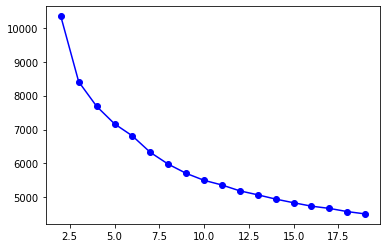

In [109]:
plt.plot(ssd[:,0], ssd[:,1], 'bo-')

In [110]:
km = KMeans(n_clusters=10).fit(X_data)

In [ ]:
labels_pred = km.predict(raw_df.drop(['Unnamed: 0','gt_ndvi','gt_msavi2'],axis = 1, inplace = False))

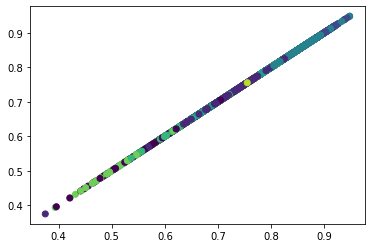

In [132]:
plt.scatter(raw_df['gt_msavi2'], raw_df['gt_msavi2'],c = labels_pred)

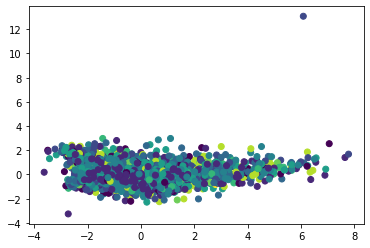

In [113]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=2)
X_new = pca_1.fit_transform(X_data)
X_new = pd.DataFrame(X_new)
plt.scatter(X_new[0], X_new[1],c = labels_pred)

(array([256., 551., 195., 432., 483., 315., 236., 103., 375.,   1.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

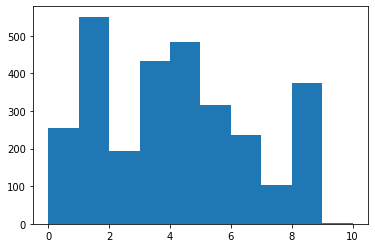

In [137]:
bins = [x for x in range(11)]
plt.hist(labels_pred,bins = bins)

In [115]:
km.inertia_

5516.938655195946

In [55]:
import pickle
filename = 'kmeans_model_v1.sav'
pickle.dump(km, open(filename, 'wb'))

# Cluster analysis

In [116]:
raw_df['Labels_km'] = labels_pred

In [117]:
raw_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,gt_ndvi,gt_msavi2,Labels_km
0,0,1.371782,1.119148,2.469079,3.164964,2.753141,-0.928685,-0.478396,1.861814,8.483894,0.026970,0.385535,0.546250,7
1,1,0.695777,0.471995,0.878227,2.781074,2.894665,-0.336990,0.175473,1.443329,5.313738,0.306638,0.520737,0.679225,0
2,2,0.535083,0.745858,2.881621,2.780188,2.232395,-0.426074,-0.336759,0.365880,8.386508,-0.228232,0.424557,0.578246,7
3,3,-0.026857,0.098330,1.059372,2.443299,3.532076,0.864627,-0.165695,0.146986,3.512267,0.124011,0.732383,0.842036,3
4,4,1.286062,0.822033,0.607374,2.285303,2.499143,-0.602961,-0.222075,0.405282,3.419030,-0.756155,0.571616,0.721583,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,2942,0.749474,-0.181962,0.440250,1.545387,3.097845,0.222938,0.091134,-0.120250,2.500812,-0.222808,0.707826,0.825318,1
2943,2943,1.246725,0.072085,0.813656,1.651416,3.228261,-0.621067,-0.019703,0.594698,2.494640,-0.476267,0.699463,0.820091,1
2944,2944,1.187707,-0.434288,0.655187,2.047939,2.747905,-0.557238,-0.582953,0.925118,2.281928,0.705683,0.694561,0.817328,4
2945,2945,0.504088,-0.079601,-0.365565,2.642547,1.700682,-0.666713,-0.822734,0.158457,2.169391,-0.651873,0.680096,0.806699,4


In [118]:
groups = raw_df.groupby('Labels_km')

In [120]:
for i in range(10):
    g_df = groups.get_group(i)
    mean_ndvi = g_df['gt_ndvi'].mean()
    mean_msavi2 = g_df['gt_msavi2'].mean()
    print("Label : ",str(i))
    print("Mean NDVI : ",str(mean_ndvi))
    print("Mean msavi2 : ",str(mean_msavi2))
    print("***********************************************")

Label :  0
Mean NDVI :  0.4654821644799114
Mean msavi2 :  0.6246018602145016
***********************************************
Label :  1
Mean NDVI :  0.6028687989330542
Mean msavi2 :  0.7459839708448772
***********************************************
Label :  2
Mean NDVI :  0.8028017613907407
Mean msavi2 :  0.8891703709566902
***********************************************
Label :  3
Mean NDVI :  0.719729095747437
Mean msavi2 :  0.8336575293378264
***********************************************
Label :  4
Mean NDVI :  0.7566455624088596
Mean msavi2 :  0.859642793671092
***********************************************
Label :  5
Mean NDVI :  0.5981210715804879
Mean msavi2 :  0.7383756962930406
***********************************************
Label :  6
Mean NDVI :  0.4925408759076625
Mean msavi2 :  0.6487105891437375
***********************************************
Label :  7
Mean NDVI :  0.40432201892689734
Mean msavi2 :  0.5642174372601242
***********************************************
L

In [140]:
df= pd.DataFrame()
df['Label'] = None
df['NDVI'] = None
df['MSAVI'] = None
df.head()

,Label,NDVI,MSAVI


++++++++ 0 ++++++++
++++++++ 1 ++++++++
++++++++ 2 ++++++++
++++++++ 3 ++++++++
++++++++ 4 ++++++++
++++++++ 5 ++++++++
++++++++ 6 ++++++++
++++++++ 7 ++++++++
++++++++ 8 ++++++++
++++++++ 9 ++++++++


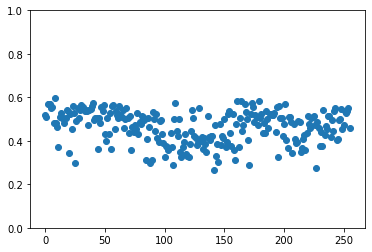

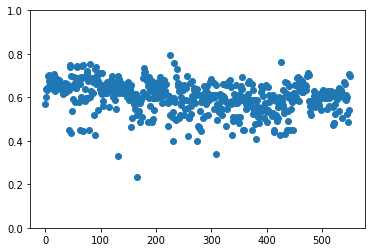

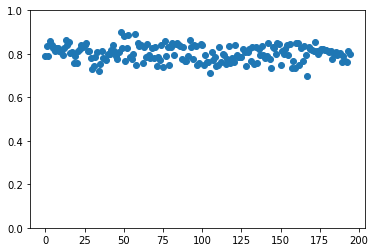

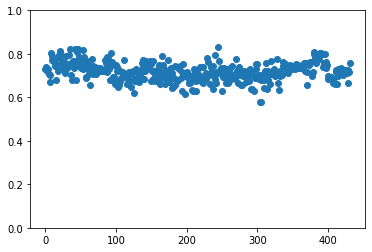

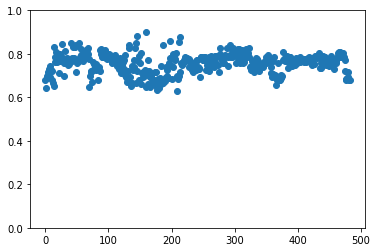

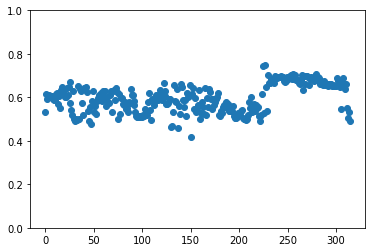

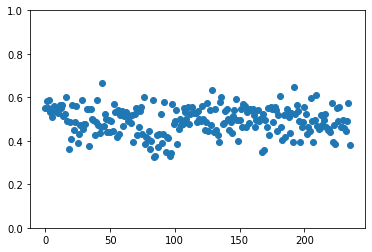

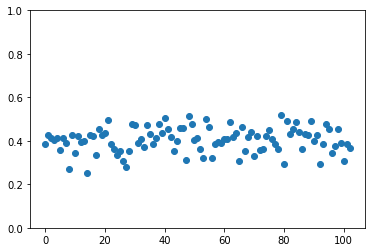

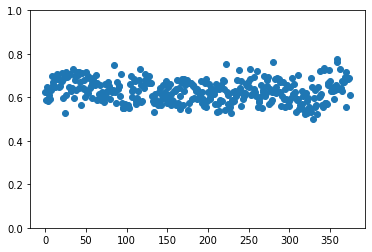

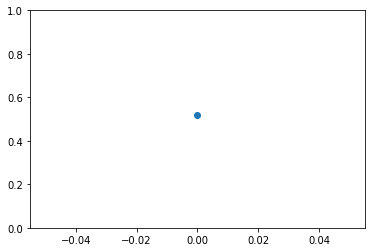

<Figure size 432x288 with 0 Axes>

In [141]:
for i in range(10):
    print("++++++++",str(i),"++++++++")
    g_df = groups.get_group(i)
    x_axis_p = [i for i in range(len(g_df))]
    plt.scatter(x_axis_p,g_df['gt_ndvi'])
    plt.ylim((0,1))
    plt.savefig('plots/'+str(i)+'_ndvi.png')
    plt.figure()
    mean_ndvi = g_df['gt_ndvi'].mean()
    mean_msavi2 = g_df['gt_msavi2'].mean()
    f = [i,mean_ndvi,mean_msavi2]
    df.loc[len(df)] = f

In [138]:
df = df.sort_values(by = 'NDVI')
df = df.reset_index()
df.head(len(df))

,index,Label,NDVI,MSAVI
0,7,7.0,0.404322,0.564217
1,0,0.0,0.465482,0.624602
2,6,6.0,0.492541,0.648711
3,9,9.0,0.518927,0.620074
4,5,5.0,0.598121,0.738376
5,1,1.0,0.602869,0.745984
6,8,8.0,0.628911,0.767512
7,3,3.0,0.719729,0.833658
8,4,4.0,0.756646,0.859643
9,2,2.0,0.802802,0.889170


In [143]:
labels = {0:1, 1:5, 2:9, 3:7, 4:8, 5:4, 6:2, 7:0, 8:6, 9:3}

In [144]:
raw_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,gt_ndvi,gt_msavi2,Labels_km
0,0,1.371782,1.119148,2.469079,3.164964,2.753141,-0.928685,-0.478396,1.861814,8.483894,0.026970,0.385535,0.546250,7
1,1,0.695777,0.471995,0.878227,2.781074,2.894665,-0.336990,0.175473,1.443329,5.313738,0.306638,0.520737,0.679225,0
2,2,0.535083,0.745858,2.881621,2.780188,2.232395,-0.426074,-0.336759,0.365880,8.386508,-0.228232,0.424557,0.578246,7
3,3,-0.026857,0.098330,1.059372,2.443299,3.532076,0.864627,-0.165695,0.146986,3.512267,0.124011,0.732383,0.842036,3
4,4,1.286062,0.822033,0.607374,2.285303,2.499143,-0.602961,-0.222075,0.405282,3.419030,-0.756155,0.571616,0.721583,1


In [145]:
raw_df['Label_T'] = 0

In [146]:
raw_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,gt_ndvi,gt_msavi2,Labels_km,Label_T
0,0,1.371782,1.119148,2.469079,3.164964,2.753141,-0.928685,-0.478396,1.861814,8.483894,0.026970,0.385535,0.546250,7,0
1,1,0.695777,0.471995,0.878227,2.781074,2.894665,-0.336990,0.175473,1.443329,5.313738,0.306638,0.520737,0.679225,0,0
2,2,0.535083,0.745858,2.881621,2.780188,2.232395,-0.426074,-0.336759,0.365880,8.386508,-0.228232,0.424557,0.578246,7,0
3,3,-0.026857,0.098330,1.059372,2.443299,3.532076,0.864627,-0.165695,0.146986,3.512267,0.124011,0.732383,0.842036,3,0
4,4,1.286062,0.822033,0.607374,2.285303,2.499143,-0.602961,-0.222075,0.405282,3.419030,-0.756155,0.571616,0.721583,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,2942,0.749474,-0.181962,0.440250,1.545387,3.097845,0.222938,0.091134,-0.120250,2.500812,-0.222808,0.707826,0.825318,1,0
2943,2943,1.246725,0.072085,0.813656,1.651416,3.228261,-0.621067,-0.019703,0.594698,2.494640,-0.476267,0.699463,0.820091,1,0
2944,2944,1.187707,-0.434288,0.655187,2.047939,2.747905,-0.557238,-0.582953,0.925118,2.281928,0.705683,0.694561,0.817328,4,0
2945,2945,0.504088,-0.079601,-0.365565,2.642547,1.700682,-0.666713,-0.822734,0.158457,2.169391,-0.651873,0.680096,0.806699,4,0


In [147]:
rows = raw_df[raw_df['Labels_km']==0].index.tolist()
len(rows)

256

In [148]:
raw_df.iloc[rows,-1] = labels[0]

In [149]:
raw_df.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,gt_ndvi,gt_msavi2,Labels_km,Label_T
0,0,1.371782,1.119148,2.469079,3.164964,2.753141,-0.928685,-0.478396,1.861814,8.483894,0.026970,0.385535,0.546250,7,0
1,1,0.695777,0.471995,0.878227,2.781074,2.894665,-0.336990,0.175473,1.443329,5.313738,0.306638,0.520737,0.679225,0,1
2,2,0.535083,0.745858,2.881621,2.780188,2.232395,-0.426074,-0.336759,0.365880,8.386508,-0.228232,0.424557,0.578246,7,0
3,3,-0.026857,0.098330,1.059372,2.443299,3.532076,0.864627,-0.165695,0.146986,3.512267,0.124011,0.732383,0.842036,3,0
4,4,1.286062,0.822033,0.607374,2.285303,2.499143,-0.602961,-0.222075,0.405282,3.419030,-0.756155,0.571616,0.721583,1,0
5,5,1.187692,-0.561419,0.853324,3.243690,2.172553,-0.645173,0.098396,0.837867,5.242691,-0.158466,0.509093,0.669674,0,1
6,6,1.649028,0.786191,1.369962,2.931042,2.322704,-0.342745,0.171044,1.164988,4.129217,-0.343992,0.534749,0.693025,5,0
7,7,0.786325,0.484408,1.913482,3.192196,2.830098,-0.844277,-0.366002,1.873413,6.063483,-0.953146,0.552617,0.707412,6,0
8,8,1.807728,-0.815772,1.943221,3.755296,2.536918,0.463441,-0.659026,0.670408,3.897237,-0.332149,0.614828,0.752924,5,0
9,9,1.807285,0.011891,2.439909,3.614518,2.839079,0.417887,-0.359382,1.203986,4.513116,-0.561346,0.591314,0.735064,5,0


In [150]:
for i in range(10):
    rows = raw_df[raw_df['Labels_km']==i].index.tolist()
    raw_df.iloc[rows,-1] = labels[i]

In [151]:
raw_df.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,gt_ndvi,gt_msavi2,Labels_km,Label_T
0,0,1.371782,1.119148,2.469079,3.164964,2.753141,-0.928685,-0.478396,1.861814,8.483894,0.026970,0.385535,0.546250,7,0
1,1,0.695777,0.471995,0.878227,2.781074,2.894665,-0.336990,0.175473,1.443329,5.313738,0.306638,0.520737,0.679225,0,1
2,2,0.535083,0.745858,2.881621,2.780188,2.232395,-0.426074,-0.336759,0.365880,8.386508,-0.228232,0.424557,0.578246,7,0
3,3,-0.026857,0.098330,1.059372,2.443299,3.532076,0.864627,-0.165695,0.146986,3.512267,0.124011,0.732383,0.842036,3,7
4,4,1.286062,0.822033,0.607374,2.285303,2.499143,-0.602961,-0.222075,0.405282,3.419030,-0.756155,0.571616,0.721583,1,5
5,5,1.187692,-0.561419,0.853324,3.243690,2.172553,-0.645173,0.098396,0.837867,5.242691,-0.158466,0.509093,0.669674,0,1
6,6,1.649028,0.786191,1.369962,2.931042,2.322704,-0.342745,0.171044,1.164988,4.129217,-0.343992,0.534749,0.693025,5,4
7,7,0.786325,0.484408,1.913482,3.192196,2.830098,-0.844277,-0.366002,1.873413,6.063483,-0.953146,0.552617,0.707412,6,2
8,8,1.807728,-0.815772,1.943221,3.755296,2.536918,0.463441,-0.659026,0.670408,3.897237,-0.332149,0.614828,0.752924,5,4
9,9,1.807285,0.011891,2.439909,3.614518,2.839079,0.417887,-0.359382,1.203986,4.513116,-0.561346,0.591314,0.735064,5,4


In [153]:
raw_df.to_csv('Labeled_data.csv')

In [154]:
groups = raw_df.groupby('Label_T')

In [155]:
for i in range(10):
    g_df = groups.get_group(i)
    mean_ndvi = g_df['gt_ndvi'].mean()
    mean_msavi2 = g_df['gt_msavi2'].mean()
    print("Label : ",str(i))
    print("Mean NDVI : ",str(mean_ndvi))
    print("Mean msavi2 : ",str(mean_msavi2))
    print("***********************************************")

Label :  0
Mean NDVI :  0.40432201892689734
Mean msavi2 :  0.5642174372601242
***********************************************
Label :  1
Mean NDVI :  0.4654821644799114
Mean msavi2 :  0.6246018602145016
***********************************************
Label :  2
Mean NDVI :  0.4925408759076625
Mean msavi2 :  0.6487105891437375
***********************************************
Label :  3
Mean NDVI :  0.5189265675129376
Mean msavi2 :  0.6200737429353816
***********************************************
Label :  4
Mean NDVI :  0.5981210715804879
Mean msavi2 :  0.7383756962930406
***********************************************
Label :  5
Mean NDVI :  0.6028687989330542
Mean msavi2 :  0.7459839708448772
***********************************************
Label :  6
Mean NDVI :  0.6289105264513598
Mean msavi2 :  0.7675118673873654
***********************************************
Label :  7
Mean NDVI :  0.719729095747437
Mean msavi2 :  0.8336575293378264
***********************************************


In [161]:
groups.get_group(3)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,gt_ndvi,gt_msavi2,Labels_km,Label_T
1162,1162,17.38864,-1.281804,-0.537654,15.027751,8.251986,2.227059,4.508906,-1.705544,6.859877,6.836519,0.518927,0.620074,9,3


In [162]:
df= pd.DataFrame()
df['Label'] = None
df['NDVI'] = None
df['MSAVI'] = None
df.head()

,Label,NDVI,MSAVI


++++++++ 0 ++++++++
++++++++ 1 ++++++++
++++++++ 2 ++++++++
++++++++ 3 ++++++++
++++++++ 4 ++++++++
++++++++ 5 ++++++++
++++++++ 6 ++++++++
++++++++ 7 ++++++++
++++++++ 8 ++++++++
++++++++ 9 ++++++++


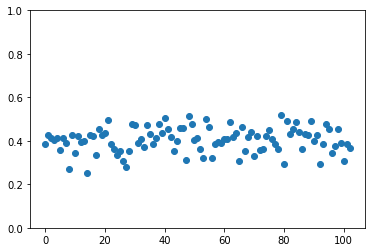

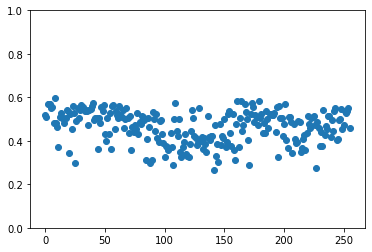

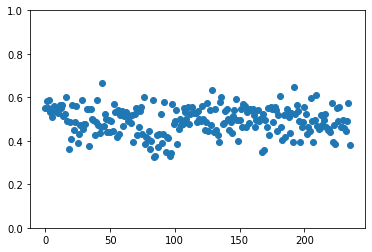

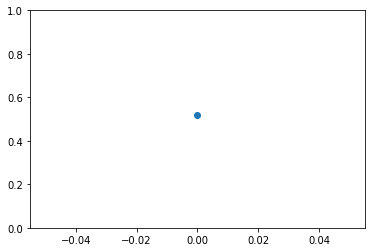

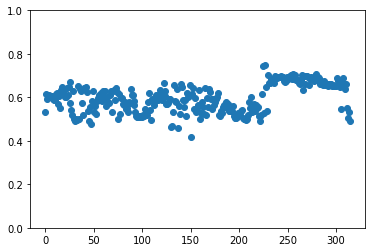

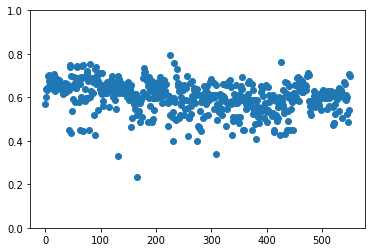

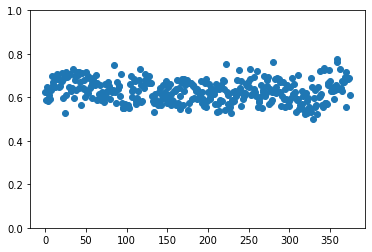

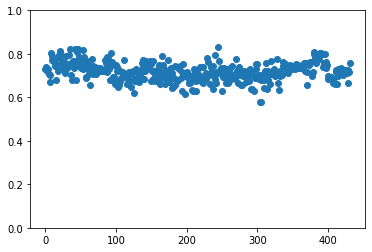

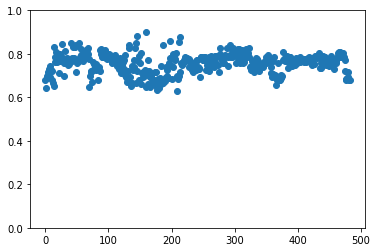

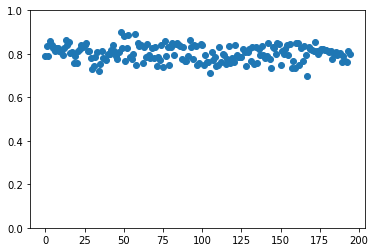

<Figure size 432x288 with 0 Axes>

In [163]:
for i in range(10):
    print("++++++++",str(i),"++++++++")
    g_df = groups.get_group(i)
    x_axis_p = [i for i in range(len(g_df))]
    plt.scatter(x_axis_p,g_df['gt_ndvi'])
    plt.ylim((0,1))
    plt.savefig('plots/'+str(i)+'_ndvi.png')
    plt.figure()
    mean_ndvi = g_df['gt_ndvi'].mean()
    mean_msavi2 = g_df['gt_msavi2'].mean()
    f = [i,mean_ndvi,mean_msavi2]
    df.loc[len(df)] = f

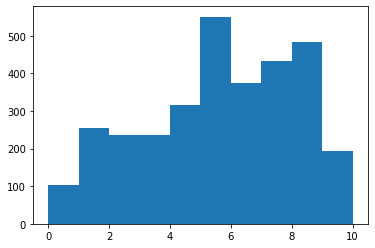

In [166]:
bins = [0,1,2,4,5,6,7,8,9,10]
df = pd.read_csv('Labeled_data.csv')
plt.hist(df['Label_T'],bins = bins)
plt.savefig('plots/Histogram_Classes.png')